In [1]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import pandas as pd
from keras.utils import np_utils
from keras.utils import to_categorical
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('pd_speech_features.csv')
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
train_X = df.iloc[:,0:755].values
train_Y = df.iloc[:,1].values

In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
kategoricka_premenna = np_utils.to_categorical(train_Y)

In [7]:
model = Sequential()
model.add(Dense(755, input_dim=755, activation='sigmoid'))
model.add(Dense(355, activation='sigmoid'))
model.add(Dense(2))

In [8]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
#model.fit(train_X, kategoricka_premenna)
history = model.fit(train_X, kategoricka_premenna,validation_split = 0.1, epochs=100, batch_size=4)
scores = model.evaluate(train_X, kategoricka_premenna)

Train on 680 samples, validate on 76 samples
Epoch 1/100
680/680 [==============================] - 4s 7ms/step - loss: 0.3884 - accuracy: 0.5206 - val_loss: 0.3080 - val_accuracy: 0.4342
Epoch 2/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2744 - accuracy: 0.5588 - val_loss: 0.3253 - val_accuracy: 0.4342
Epoch 3/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2495 - accuracy: 0.5338 - val_loss: 0.2310 - val_accuracy: 0.7237
Epoch 4/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2447 - accuracy: 0.5882 - val_loss: 0.2308 - val_accuracy: 0.5658
Epoch 5/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2440 - accuracy: 0.5735 - val_loss: 0.2193 - val_accuracy: 0.7237
Epoch 6/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2472 - accuracy: 0.5574 - val_loss: 0.2526 - val_accuracy: 0.4342
Epoch 7/100
680/680 [==============================] - 5s 7ms/step - loss: 0.2271 - accuracy: 0.6

680/680 [==============================] - 4s 6ms/step - loss: 0.2276 - accuracy: 0.6382 - val_loss: 0.1981 - val_accuracy: 0.7237
Epoch 58/100
680/680 [==============================] - 5s 7ms/step - loss: 0.2106 - accuracy: 0.6691 - val_loss: 0.2214 - val_accuracy: 0.7237
Epoch 59/100
680/680 [==============================] - 4s 7ms/step - loss: 0.2056 - accuracy: 0.7132 - val_loss: 0.2377 - val_accuracy: 0.5132
Epoch 60/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2073 - accuracy: 0.6721 - val_loss: 0.2811 - val_accuracy: 0.5132
Epoch 61/100
680/680 [==============================] - 5s 7ms/step - loss: 0.2045 - accuracy: 0.6603 - val_loss: 0.2390 - val_accuracy: 0.5132
Epoch 62/100
680/680 [==============================] - 5s 7ms/step - loss: 0.2118 - accuracy: 0.6618 - val_loss: 0.1937 - val_accuracy: 0.7237
Epoch 63/100
680/680 [==============================] - 4s 6ms/step - loss: 0.2108 - accuracy: 0.6456 - val_loss: 0.1947 - val_accuracy: 0.7237
Epoch

In [9]:
print("\nPresnosť siete %.2f%%" % (scores[1]*100))


Presnosť siete 70.11%


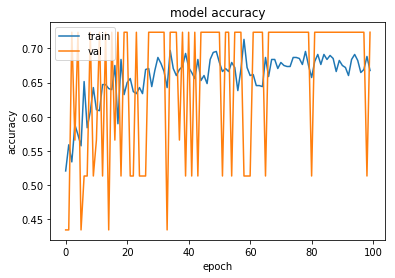

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

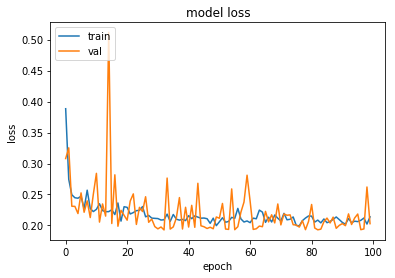

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()